In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import xrUWLCM as xrU
import math

#from xhistogram.xarray import histogram
import xarray as xr

import matplotlib as mpl


# UWLCM data diretories #

In [2]:
pgsdir = '/net/pr2/projects/plgrid/plgguwicmw/wyniki/dycoms_rf01/'
figoutdir = '/net/people/plgrid/plgpdziekan/wyniki/dycoms_rf01/figs/'
scratchdir = '/net/tscratch/people/plgpdziekan/'
#ncoutdir = '/net/people/plgrid/plgpdziekan/wyniki/dycoms_rf01/netcdf/'

In [3]:
datadir = {}

datadir['dz50m'] = {}
datadir['dz50m']['dx5000m'] = {}
datadir['dz50m']['dx5000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta50_dx5000m_dz50m_X250km_longlong_out_blk_1m/"
datadir['dz50m']['dx5000m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx5000m_dz50m_X250km_longlong_out_blk_1m/"

datadir['dz20m'] = {}
datadir['dz20m']['dx2000m'] = {}
#datadir['dz20m']['dx2000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta20_dx2000m_dz20m_X100km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Isotropic'] = scratchdir + "singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X574km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Isotropic_H100'] = scratchdir + "singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X100km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Anisotropic'] = scratchdir + "dycomsRF01_AnisoSmgAlong_dx2000m_dz20m_X100km_longlong_out_blk_1m/"
datadir['dz20m']['dx2000m']['Anisotropic_H'] = scratchdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt1_dx2000m_dz20m_X574km_longlong_out_blk_1m/"

datadir['dz20m']['dx1000m'] = {}
datadir['dz20m']['dx1000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta20_dx1000m_dz20m_X50km_longlong_out_blk_1m/"
datadir['dz20m']['dx1000m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx1000m_dz20m_X50km_longlong_out_blk_1m/"

datadir['dz10m'] = {}
datadir['dz10m']['dx1000m'] = {}
datadir['dz10m']['dx1000m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta10_dt1_dx1000m_dz10m_X100km_longlong_out_blk_1m/"
datadir['dz10m']['dx1000m']['Anisotropic'] = scratchdir + "singu_gh200_dycomsRF01_AnisoSmgAlong_dt0.25_dx1000m_dz10m_X287km_longlong_out_blk_1m/"

datadir['dz50m']['dx500m'] = {}
datadir['dz50m']['dx500m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta50_dx500m_dz50m_X250km_longlong_out_blk_1m/"

datadir['dz20m']['dx500m'] = {}
datadir['dz20m']['dx500m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx500m_dz20m_X50km_longlong_out_blk_1m/"

datadir['dz10m']['dx100m'] = {}
datadir['dz10m']['dx100m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta10_dx100m_dz10m_X50km_longlong_out_blk_1m/"
datadir['dz10m']['dx100m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dx100m_dz10m_X50km_longlong_out_blk_1m/"
#datadir['dz10m']['dx100m']['AnisoSmgAlong_dt0.5'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dt5e-1_dx100m_dz10m_X50km_longlong_out_blk_1m/"

datadir['dz5m'] = {}
datadir['dz5m']['dx50m'] = {}
datadir['dz5m']['dx50m']['Isotropic'] = scratchdir + "dycomsRF01_SMG_SgsDelta5_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/"
datadir['dz5m']['dx50m']['Anisotropic'] = scratchdir + "dycomsRF01_AnisoSmgAlong_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/"

datadir['dz2.5m'] = {}
datadir['dz2.5m']['dx25m'] = {}
datadir['dz2.5m']['dx25m']['Isotropic'] = pgsdir + "dycomsRF01_SMG_SgsDelta2.5_dt0.25_dx25m_dz2.5m_X12.5km_longlong_out_blk_1m/"
datadir['dz2.5m']['dx25m']['Anisotropic'] = pgsdir + "dycomsRF01_AnisoSmgAlong_dt0.25_dx25m_dz2.5m_X12.5km_longlong_out_blk_1m/"

In [4]:
resolution_nicename = {\
    'dx5000m' : '$\Delta x = 5000 \mathrm{m}$', \
    'dx2000m' : '$\Delta x = 2000 \mathrm{m}$', \
    'dx1000m' : '$\Delta x = 1000 \mathrm{m}$', \
    'dx100m' : '$\Delta x = 100 \mathrm{m}$', \
    'dx50m' : '$\Delta x = 50 \mathrm{m}$', \
    'dx25m' : '$\Delta x = 25 \mathrm{m}$', \
    'dz50m' : '$\Delta z = 50 \mathrm{m}$', \
    'dz20m' : '$\Delta z = 20 \mathrm{m}$', \
    'dz10m' : '$\Delta z = 10 \mathrm{m}$', \
    'dz5m' : '$\Delta z = 5 \mathrm{m}$', \
    'dz2.5m' : '$\Delta z = 2.5 \mathrm{m}$', \
}

# define simulations to be plotted #

In [5]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# dx, dy, SGS, time period in hours for averaging histograms and profiles, plot parameters, coarsening factor, domain size
# wider lines are for 100x anisotropy, narrower for 10x
data_iso = {\
    #('dx5000m', 'dz50m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[0],    'lw' : 2}, 1, 250), \
    #('dx2000m', 'dz20m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Isotropic') :   ((1.5,2), {'ls' : '-.', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    ('dx2000m', 'dz20m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[1],    'lw' : 2}, 1, 574), \
    #('dx2000m', 'dz20m',  'Isotropic_H100') :   ((0.5,1), {'ls' : '-.', 'color' : colors[1],    'lw' : 4}, 1, 100), \
    #('dx1000m', 'dz20m',  'Isotropic') :   ((1.5,2), {'ls' : '-.', 'color' : colors[6],    'lw' : 1.5}, 1, 100), \
    #('dx1000m', 'dz20m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[6],    'lw' : 1.5}, 2, 50), \
    #('dx1000m', 'dz10m',  'Isotropic') :   ((20,24), {'ls' : '-.', 'color' : colors[2],    'lw' : 2}, 2, 100), \
    #('dx1000m', 'dz10m',  'Isotropic') :   ((1.5, 2), {'ls' : '-.', 'color' : colors[2],    'lw' : 2}, 2, 100), \
    #('dx100m',  'dz10m',  'Isotropic') :   ((6,7),   {'ls' : '-.', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    #('dx100m',  'dz10m',  'Isotropic') :   ((1.5,2),   {'ls' : '-.', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    ('dx50m',   'dz5m',   'Isotropic') :   ((6,7),   {'ls' : '-.', 'color' : colors[4],    'lw' : 1}, 40, 25), \
    #('dx25m',   'dz2.5m', 'Isotropic') :   ((1.2,1.375),   {'ls' : '--', 'color' : colors[5],    'lw' : 1}, 80, 12.5), \
}

data_aniso = {\
    #('dx5000m', 'dz50m',  'Anisotropic') : ((20,24), {'ls' : '--', 'color' : colors[0],    'lw' : 2}, 1, 250), \
    ('dx2000m', 'dz20m',  'Anisotropic') : ((20,24), {'ls' : '--', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Anisotropic') : ((1.5,2), {'ls' : '--', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx2000m', 'dz20m',  'Anisotropic_H') : ((0.5,1), {'ls' : '--', 'color' : colors[1],    'lw' : 2}, 1, 100), \
    #('dx1000m', 'dz20m',  'Anisotropic') : ((1.5,2), {'ls' : '--', 'color' : colors[6],    'lw' : 1.5}, 1, 100), \
    #('dx1000m', 'dz20m',  'Anisotropic') : ((20,24), {'ls' : '--', 'color' : colors[6],    'lw' : 1.5}, 2, 50), \
    #('dx1000m', 'dz10m',  'Anisotropic') :   ((1.75, 1.875), {'ls' : '--', 'color' : colors[2],    'lw' : 2}, 2, 287), \
    #('dx100m',  'dz10m',  'Anisotropic') : ((6,7),   {'ls' : '--', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    #('dx100m',  'dz10m',  'Anisotropic') : ((1.5,2),   {'ls' : '--', 'color' : colors[3],    'lw' : 1}, 20, 50), \
    ('dx50m',   'dz5m',   'Anisotropic') : ((6,7),   {'ls' : '--', 'color' : colors[4],    'lw' : 1}, 40, 25), \
    #('dx25m',   'dz2.5m', 'Anisotropic') : ((2,3),   {'ls' : '--', 'color' : colors[5],    'lw' : 1}, 80, 12.5), \
}

data_to_plot = data_iso | data_aniso
outname = 'isotropic_anisotropic'

#data_to_plot = data_aniso
#outname = 'anisotropic'

#data_to_plot = data_iso
#outname = 'isotropic'

# load the data

In [6]:
%%time

data = {}
data_DSD = {}

for (dx, dz, sgs), *r in data_to_plot.items():
    simname = dx + ' ' + dz + ' ' + sgs
    #data[simname] = xrU.load_outdir(dir)
    data[simname], data_DSD[simname] = xrU.load_outdir(datadir[dz][dx][sgs])
    data[simname] = xrU.calc_all(data[simname])
    #data[simname] = xrU.calc_precip_flux(data[simname])
    data[simname] = xrU.convert_units(data[simname])
    #data[simname] = xrU.calc_cloud_base(data[simname], xrU.is_cloudy(data[simname], "rico")) # using rico conditions, because dycoms one cant be used with 1-mom data
    #data[simname] = xrU.calc_cloud_top(data[simname], xrU.is_cloudy(data[simname], "rico"))
    #data[simname] = xrU.calc_zi(data[simname], xrU.zi(data[simname], "dycoms"))
    #data_DSD[simname] = xrU.calc_all(data_DSD[simname]).pipe(xrU.convert_units)

Group lgrngn not found in /net/tscratch/people/plgpdziekan/singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X574km_longlong_out_blk_1m/const.h5
Group lgrngn not found in /net/tscratch/people/plgpdziekan/dycomsRF01_SMG_SgsDelta5_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/const.h5
Group lgrngn not found in /net/tscratch/people/plgpdziekan/dycomsRF01_AnisoSmgAlong_dx2000m_dz20m_X100km_longlong_out_blk_1m/const.h5
Group lgrngn not found in /net/tscratch/people/plgpdziekan/dycomsRF01_AnisoSmgAlong_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/const.h5
CPU times: user 57 s, sys: 11.7 s, total: 1min 8s
Wall time: 1min 10s


In [12]:
data["dx2000m dz20m Isotropic"]

<xarray.Dataset> Size: 25GB
Dimensions:                 (x: 288, y: 288, z: 76, t: 49, xe: 289, ye: 289,
                             ze: 77)
Coordinates:
  * xe                      (xe) float32 1kB 0.0 2e+03 ... 5.74e+05 5.76e+05
  * ye                      (ye) float32 1kB 0.0 2e+03 ... 5.74e+05 5.76e+05
  * ze                      (ze) float32 308B 0.0 20.0 40.0 ... 1.5e+03 1.52e+03
  * x                       (x) float32 1kB 1e+03 3e+03 ... 5.73e+05 5.75e+05
  * y                       (y) float32 1kB 1e+03 3e+03 ... 5.73e+05 5.75e+05
  * z                       (z) float32 304B 10.0 30.0 ... 1.49e+03 1.51e+03
  * t                       (t) float32 196B 0.0 0.5 1.0 1.5 ... 23.0 23.5 24.0
Data variables: (12/67)
    G                       (x, y, z) float32 25MB dask.array<chunksize=(288, 288, 76), meta=np.ndarray>
    T                       (t) float32 196B dask.array<chunksize=(1,), meta=np.ndarray>
    X                       (xe, ye, ze) float32 26MB dask.array<chunksize=(289, 289, 77), meta=np.ndarray>
    Y                       (xe, ye, ze) float32 26MB dask.array<chunksize=(289, 289, 77), meta=np.ndarray>
    Z                       (xe, ye, ze) float32 26MB dask.array<chunksize=(289, 289, 77), meta=np.ndarray>
    hgt_fctr                (z) float32 304B dask.array<chunksize=(76,), meta=np.ndarray>
    ...                      ...
    rt                      (t, x, y, z) float32 1GB dask.array<chunksize=(1, 288, 288, 76), meta=np.ndarray>
    all_r_mean              float64 8B nan
    all_r_sigma             float64 8B nan
    all_r_m6                float64 8B nan
    lwp                     (t, x, y) float32 16MB dask.array<chunksize=(1, 288, 288), meta=np.ndarray>
    rwp                     (t, x, y) float32 16MB dask.array<chunksize=(1, 288, 288), meta=np.ndarray>
Attributes: (12/78)
    omp_max_threads (on MPI rank 0):  288.0
    microphysics:                     single-moment bulk
    datadir:                          /net/tscratch/people/plgpdziekan/singu_...
    th_src:                           1.0
    rv_src:                           1.0
    uv_src:                           1.0
    ...                               ...
    n2_stp:                           -1.0
    kappa2:                           0.61
    vip_abs:                          expl
    aerosol definition:               rw < 0.5 microns
    cloud droplet definition:         0.5 microns < rw < 25 microns
    rain drop definition:             25 microns < rw

In [8]:
data["dx2000m dz20m Isotropic_H100"].attrs

KeyError: 'dx2000m dz20m Isotropic_H100'

In [ ]:
data["dx2000m dz20m Isotropic"].attrs.items() ^ data["dx2000m dz20m Isotropic_H100"].attrs.items()

# TOP-DOWN VIEW

/net/tscratch/people/plgpdziekan/dycomsRF01_SMG_SgsDelta5_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/
4.0460973e-06 3.3424718
/net/tscratch/people/plgpdziekan/singu_gh200_dycomsRF01_SMG_SgsDelta20m_dt1_dx2000m_dz20m_X574km_longlong_out_blk_1m/
2.0230486e-06 6.2323003
/net/tscratch/people/plgpdziekan/dycomsRF01_AnisoSmgAlong_dt5e-1_dx50m_dz5m_X25km_longlong_out_blk_1m/
2.0230486e-06 3.4905663
/net/tscratch/people/plgpdziekan/dycomsRF01_AnisoSmgAlong_dx2000m_dz20m_X100km_longlong_out_blk_1m/
0.00028390117 5.8330207


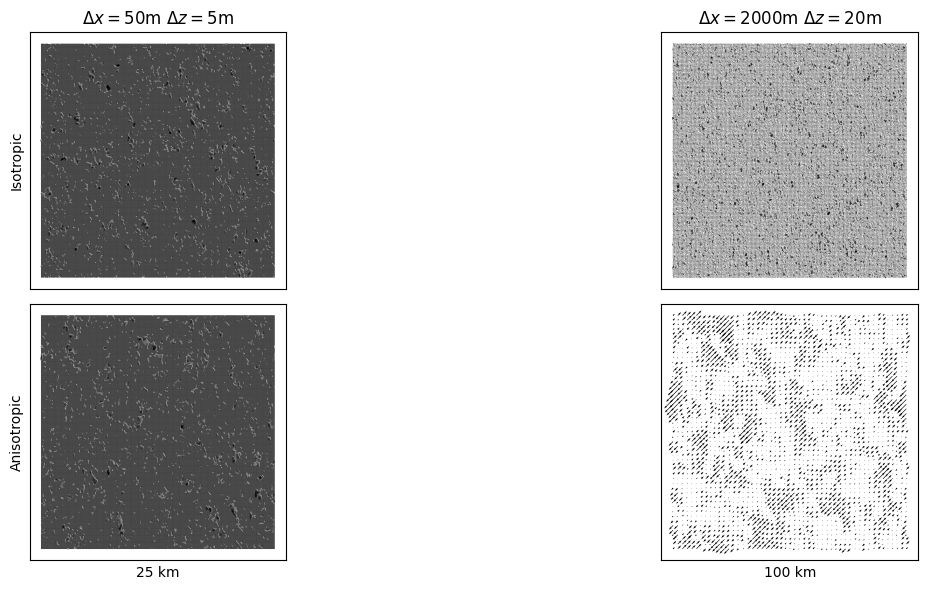

In [7]:
res_to_plot=[('dx5000m', 'dz50m'), ('dx2000m', 'dz20m'), ('dx100m', 'dz10m'), ('dx50m', 'dz5m'), ('dx25m', 'dz2.5m')]
res_to_plot=[('dx50m', 'dz5m'), ('dx100m', 'dz10m'), ('dx1000m', 'dz10m'), ('dx1000m', 'dz20m'), ('dx2000m', 'dz20m')]
sgs_to_plot=['Isotropic', 'Isotropic_H', 'Isotropic_H100']
sgs_to_plot=['Isotropic', 'Anisotropic']
res_to_plot=[('dx50m', 'dz5m'), ('dx2000m', 'dz20m')]
sgs_to_plot=['Isotropic', 'Anisotropic']

ncol = len(res_to_plot)
nrow = len(sgs_to_plot)
fig, ax = plt.subplots(nrow,ncol, figsize=(16.5,6))


#for row, sgs_to_plot in enumerate(['Isotropic', 'Anisotropic']):
for row, sgs in enumerate(sgs_to_plot):
    for col, (dx, dz) in enumerate(res_to_plot):
        if ncol > 1:
            axrc = ax[row,col]
        else:
            axrc = ax[row]
        simname = dx + ' ' + dz + ' ' + sgs
        print(data[simname].datadir)
        t_av_end = data_to_plot[(dx, dz, sgs)][0][1] # end time of the averaging period
        _data = data[simname]        
        
        #coarsen to 2km
        #scale = data_to_plot[(dx, dz, sgs)][2]
        #_data = data[simname].coarsen(x=scale, y=scale, boundary="trim").mean()        

        # plotting scalars
        ##var = _data.lwp.sel(t=t_av_end, method='nearest')
        #var = _data.w.sel(t=t_av_end, method='nearest').sel(z=400, method='nearest')
        #var_scaled = var / var.mean()
        ##im = var.plot(x="x", cmap='Blues_r', ax=axrc, add_colorbar=False)
        #im = var.plot(x="x", cmap='bwr', ax=axrc, add_colorbar=False)
        #fig.colorbar(im, ax=axrc).set_label('')

        #plotting vector field
        alt = 800 # altitude of cross section [m]
        u = _data.u.sel(t=t_av_end, method='nearest').sel(z=400, method='nearest')
        v = _data.u.sel(t=t_av_end, method='nearest').sel(z=400, method='nearest')
        up = u - u.mean(["x","y"])
        vp = v - v.mean(["x","y"])
        #print(_data.x, _data.y, u, v)
        #print(_data.x.to_numpy(), _data.y.to_numpy(), u.to_numpy(), v.to_numpy())
        speed = np.sqrt(up.to_numpy()**2 + vp.to_numpy()**2)
        print(speed.min(), speed.max())
        lw = 5*(speed / speed.max())**2
        strm = axrc.streamplot(_data.x.to_numpy(), _data.y.to_numpy(), up.to_numpy(), vp.to_numpy(), color=speed, cmap='autumn', linewidth=lw)
        fig.colorbar(strm.lines, ax=axrc)
        #strm = axrc.quiver(_data.x.to_numpy(), _data.y.to_numpy(), up.to_numpy(), vp.to_numpy())#, color=speed, cmap='autumn', linewidth=lw)
        
        # labels etc.
        axrc.set_xticks([])
        axrc.set_yticks([])
        axrc.set_title('')
        axrc.set_ylabel('')
        axrc.set_xlabel('')
        axrc.set_box_aspect(1)
        if row == 0:
            axrc.set_title(resolution_nicename[dx] + ' ' + resolution_nicename[dz])   
        if row == nrow-1:
            axrc.set_xlabel(str(data_to_plot[(dx, dz, sgs)][3]) + ' km')               
        if col == 0:
            axrc.set_ylabel(sgs)
        #_data.w.sel(z=300, method='nearest').sel(t=t_av_end, method='nearest').plot.contour(x="x", add_colorbar=True, ax=axrc)#, vmin=-0.6, vmax=0.6)

plt.tight_layout()
plt.savefig(figoutdir+"/topdown/"+str(outname)+"_uv400m_topdown.png", dpi=300)

In [ ]:
# lwp coarsened
scale = int(2000 / 50) # to 2km from 50m
data[sgs_to_plot].lwp.sel(t=24000, method='nearest').coarsen(x=scale, y=scale, boundary="trim").mean().plot(x="x", cmap='Blues_r')
plt.savefig(figoutdir+"/topdown/"+str(dx_to_plot)+"_"+str(dz_to_plot)+"_coarsened_to_dx2000m_"+str(sgs_to_plot)+"_"+"lwp"+"_topdown.png", dpi=300)

# TIME SERIES

<timed exec>:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


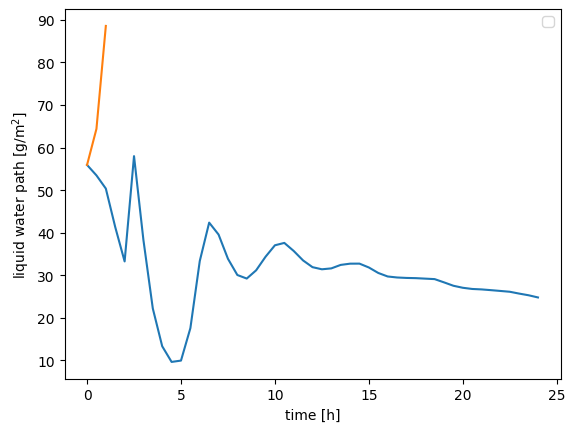

<timed exec>:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


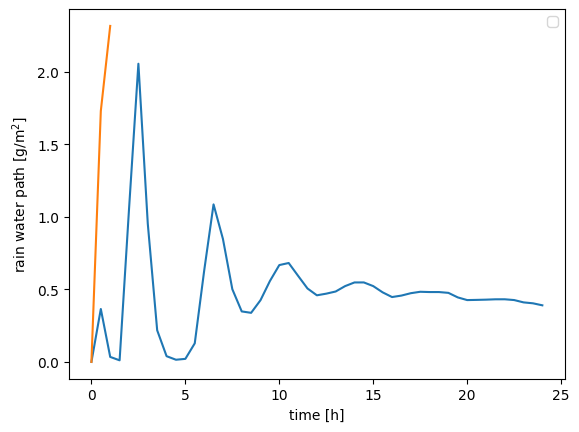

<timed exec>:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


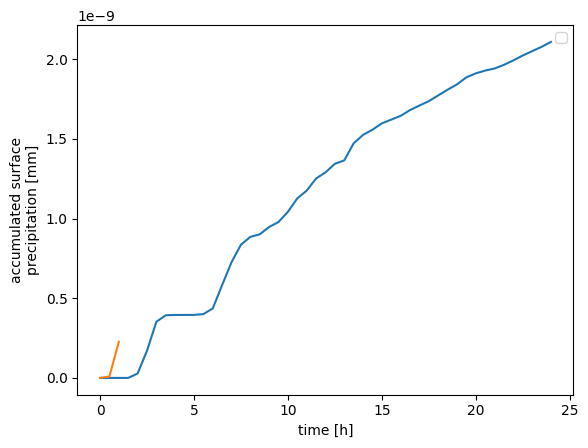

<timed exec>:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


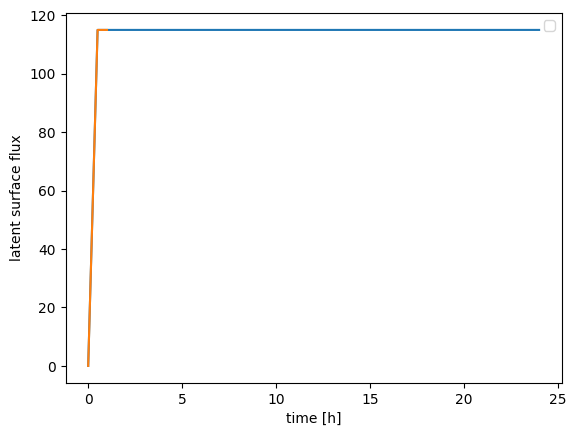

<timed exec>:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


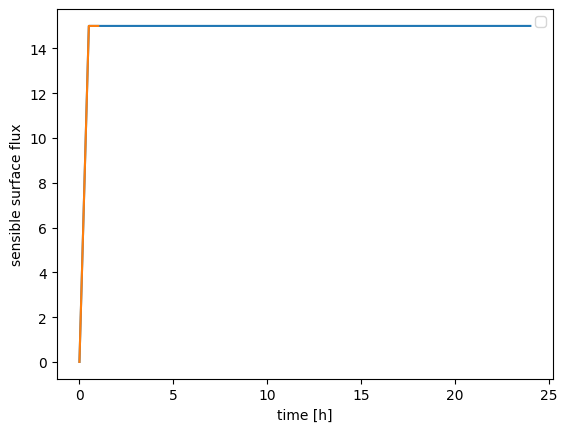

CPU times: user 31.4 s, sys: 4.68 s, total: 36 s
Wall time: 33.8 s


<Figure size 640x480 with 0 Axes>

In [9]:
%%time

plot_parameters = {
    'lwp': dict(reduce='2D_mean'),
    'rwp': dict(reduce='2D_mean'),
    #'zi': dict(reduce='2D_mean'), # NOTE: it may be different if we first calculate an average profile and later calc zi
    #'cb_z': dict(reduce='2D_mean'), # 2D_min
    #'ct_z': dict(reduce='2D_mean'), # 2D_max
    #'prflux_s': dict(reduce='2D_mean'),
    #'prflux_cb': dict(reduce='2D_mean'),
    'acc_precip_s': dict(reduce='none'),
    #'acc_precip_cb': dict(reduce='2D_sum'),
    'latent surface flux': dict(reduce='2D_mean'),
    'sensible surface flux': dict(reduce='2D_mean'),
}

for varname, params in plot_parameters.items():
    for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
        simname = dx + ' ' + dz + ' ' + sgs
        # some vars need to be calculated (TODO: move it to calculate.py?)
        if varname == 'prflux_s':
            _data=data[simname]['prflux'].sel(z=0, method='nearest')
            _data.attrs["long_name"]="surface precipitation flux"
            _data.attrs["units"]="W/m$^2$"
        elif varname == 'prflux_cb':
            _data=data[simname]['prflux'].sel(z=data[simname]['cb_z'].min(["x","y"]), method='nearest')
            #_data=data[simname]['prflux'].sel(z=700, method='nearest') # hardcoded 700m
            _data.attrs["long_name"]="cloud base precipitation flux"
            _data.attrs["units"]="W/m$^2$"
        elif varname == 'acc_precip_s':
            _data=data[simname]['puddle_liquid_volume']/data[simname]['surf_area']*1e3
            _data.attrs["long_name"]="accumulated surface precipitation"
            _data.attrs["units"]="mm"
        elif varname == 'acc_precip_cb':
            #_data=data[simname]['prflux'].sel(z=data[simname]['cb_z'].min(["x","y"]), method='nearest') \
            #    / xrU.L_evap * data[simname].outfreq * data[simname].dt
            _data=data[simname]['prflux'].sel(z=700, method='nearest') \
                / xrU.L_evap * data[simname].outfreq * data[simname].dt
            _data=_data.cumsum()
            _data.attrs["long_name"]="accumulated cloud base precipitation"
            _data.attrs["units"]="mm"
        else:
            _data=data[simname][varname]
            
        if params['reduce']=='3D_mean':
            res=_data.mean(["x","y","z"], keep_attrs=True)
        elif params['reduce']=='3D_sum':
            res=_data.sum(["x","y","z"], keep_attrs=True)
        elif params['reduce']=='2D_mean':
            res=_data.mean(["x","y"], keep_attrs=True)
        elif params['reduce']=='2D_sum':
            res=_data.sum(["x","y"], keep_attrs=True)
        elif params['reduce']=='2D_min':
            res=_data.min(["x","y"], keep_attrs=True)
        elif params['reduce']=='2D_max':
            res=_data.max(["x","y"], keep_attrs=True)
        elif params['reduce']=='none':
            res=_data
        #res.to_dataset(name=varname).to_netcdf(ncoutdir+"/series/res"+str(resolution_to_plot)+"_"+str(aerosol_to_plot)+"_series.nc", group=simname, mode='a', engine='h5netcdf')
        res = res.where(res.t <= te)
        #print(data[simname].lwp)
        res.plot()#xlim=(None, None), label=simname, **p)
    

    
    plt.legend()
    #plt.xlabel('t [h]')
    #plt.ylabel(params['nicename']+' '+params['units'])
    plt.title('')
    plt.show()
    plt.savefig(figoutdir+"/series/"+str(outname)+"_"+str(varname)+"_series.png", dpi=300)
    plt.clf()

# PROFILES 

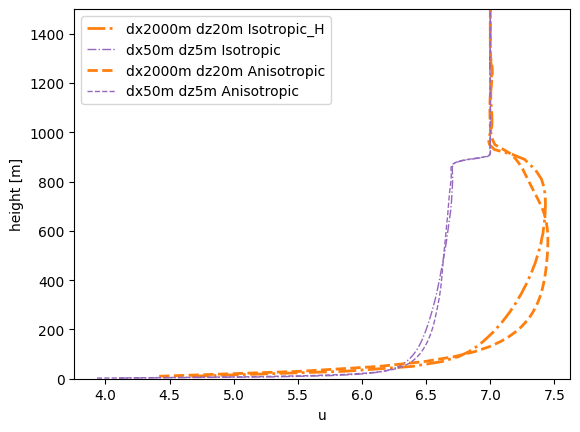

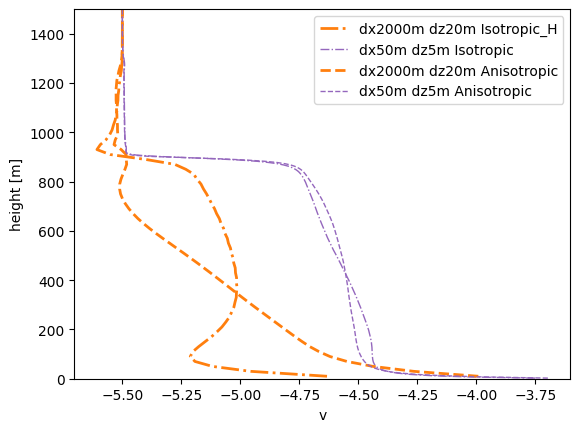

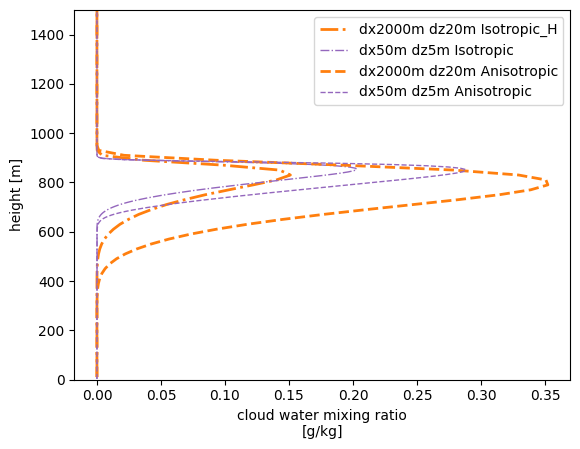

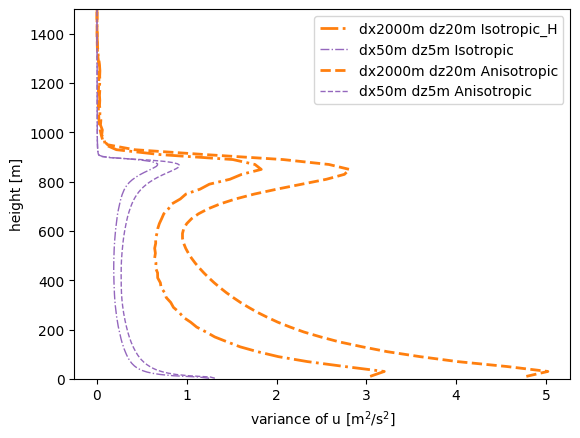

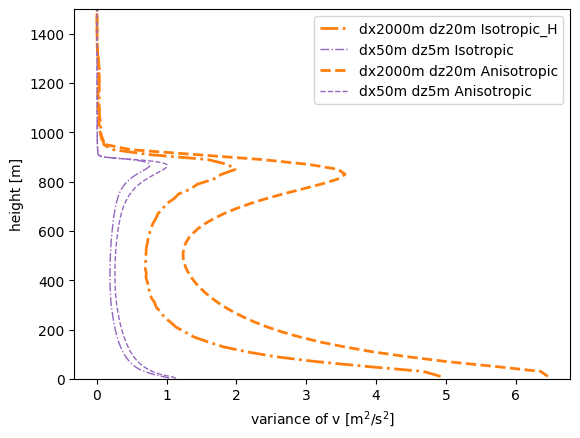

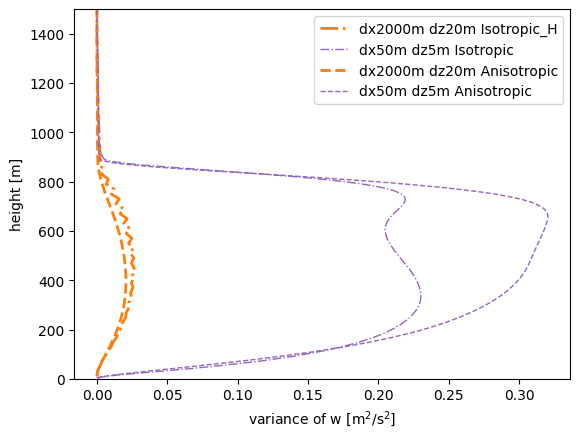

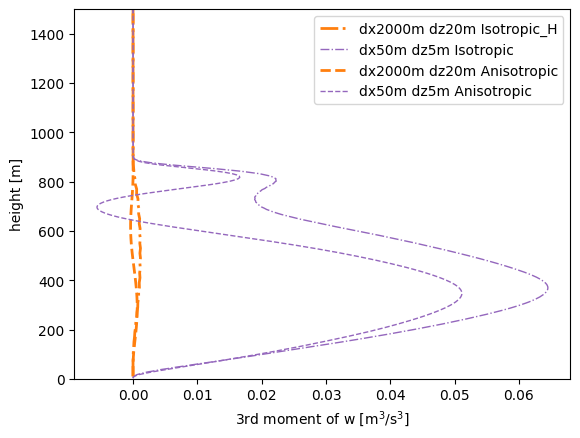

CPU times: user 8min 41s, sys: 4min 38s, total: 13min 20s
Wall time: 4min 13s


<Figure size 640x480 with 0 Axes>

In [15]:
%%time

plot_parameters = {
    'u': dict(), #dict(nicename='$v$', units='[m/s]'),
    'v': dict(), 
    #'rv': dict(),
    'rc': dict(),
    #'rr': dict(),
    #'th': dict(),
    ##'temp': dict(),
    #'RH': dict(),
    #'radiative_flux': dict(),
    #'sgs_rv_flux': dict(),
    #'sgs_th_flux': dict(),
    'u_var': dict(),
    'v_var': dict(),
    'w_var': dict(),
    'w_3rd': dict(),
    #'k_ma[0]': dict(),
    #'k_ma[1]': dict(),
    #'tke': dict(),
    
    #'rv': dict(nicename='$r_v$', units='[g/kg]'),
    #'rc': dict(nicename='$r_c$', units='[g/kg]'),
    #'rr': dict(nicename='$r_r$', units='[g/kg]'),
    #'th': dict(nicename='$\\theta$', units='[K]'),
    ##'temp': dict(nicename='T', units='[K]'),
    #'RH': dict(nicename='RH', units='[1]'),
    #'radiative_flux': dict(nicename='radiative flux', units='[W/m$^2$]'),
    #'sgs_rv_flux': dict(nicename='sgs $r_v$ flux', units='[W/m$^2$]'),
    #'sgs_th_flux': dict(nicename='sgs $\\theta$ flux', units='[W/m$^2$]'),
    #'w_var': dict(nicename='varianve of $w$', units='[$m^2/s^2$]'),
    #'w_3rd': dict(nicename='3rd moment of $w$', units='[$m^3/s^3$]'),
    #'k_ma[0]': dict(nicename='k_ma horizontal', units='[?]'),
    #'k_ma[1]': dict(nicename='k_ma vertical', units='[?]'),
#    'tke': dict(nicename='tke', units='[?]'),
}

for varname, params in plot_parameters.items():
    for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
        simname = dx + ' ' + dz + ' ' + sgs
        #print(simname)
        #print(data[simname])
        if (varname == 'sgs_rv_flux' or varname == 'sgs_th_flux'):
            if 'sgs_scheme' not in data[simname].attrs:
                _data=xr.zeros_like(data[simname]['rv'])
            else: # missing '-' sign in UWLCM output
                _data=-data[simname][varname]
        elif(varname == 'u_var'):
            _data=pow(data[simname]['u'] - data[simname]['u'].mean(["x","y"]),2)
            _data.attrs["long_name"] = "variance of u"
            _data.attrs["units"] = "m$^2$/s$^2$"
        elif(varname == 'v_var'):
            _data=pow(data[simname]['v'] - data[simname]['v'].mean(["x","y"]),2)
            _data.attrs["long_name"] = "variance of v"
            _data.attrs["units"] = "m$^2$/s$^2$"
        elif(varname == 'w_var'):
            _data=pow(data[simname]['w'],2)
            _data.attrs["long_name"] = "variance of w"
            _data.attrs["units"] = "m$^2$/s$^2$"
        elif(varname == 'w_3rd'):
            _data=pow(data[simname]['w'],3)
            _data.attrs["long_name"] = "3rd moment of w"
            _data.attrs["units"] = "m$^3$/s$^3$"
        elif((varname == 'k_ma[0]' or varname == 'k_ma[1]') and 'k_m' in data[simname]): # isotropic SMG stores k_m (single value)
            _data=data[simname]['k_m']
        else:
            if varname not in data[simname]:
                _data=xr.zeros_like(data[simname]['rv'])
            else:
                _data=data[simname][varname]

        #_data = _data.where(data[simname].lwp>5) # filter non-cloudy columns
        _data.where(_data.t>ts).where(_data.t<=te).mean(["x","y","t"], keep_attrs=True).plot(y="z",ylim=(0,1500), label=simname, **p)
        
    plt.legend()
    #plt.ylabel('z [m]')
    #plt.xlabel(params['nicename']+' '+params['units'])
    #plt.title('mean profile between ' + str(timestart) +'h and '+str(timeend)+'h')
    plt.savefig(figoutdir+"/profiles/"+str(outname)+"_"+str(varname)+"_profiles.png", dpi=300)
    plt.show()
    plt.clf()






# LWP histogram #

In [ ]:
%%time

#bins = np.arange(5, 500, 20) # NOTE: clear-sky (<5 g/m2) excluded
bins = np.arange(5./100., 500./100., 20./100) # for lwp divided by mean

#for simname in data:
for (dx, dz, sgs), (t, p, c, d) in data_to_plot.items():
    simname = dx + ' ' + dz + ' ' + sgs
    #(ts, te) = averaging_period[simname]
    _data = data[simname]
    _data = _data.where(_data.t>t[0]).where(_data.t<=t[1])
    _data = _data.coarsen(x=c, y=c, boundary="trim").mean() # coarsen
    _data /= _data.mean() # scale by the mean
    #print(_data.lwp.values)
    #plt.hist(_data.lwp)
    xr.plot.hist(_data.lwp, label=simname, bins=bins, histtype='step', density=True, **p)
    #xr.plot.hist(_data.lwp / _data.lwp.max(), label=simname, bins=100, histtype='step', density=True)

#plt.yscale('log')
plt.legend()
plt.ylabel('PDF')
#plt.xlabel('lwp [g/m$^2$]')
plt.xlabel('lwp / <lwp>')
plt.xlim(-20./100,500./100)
plt.savefig(figoutdir+"/histograms/"+str(outname)+"_lwp_scaled_CoarsenedTo2km_histogram.png", dpi=300)
plt.show()

# LWP histogram from SEVIRI and MODIS #

In [ ]:
seviri = xr.open_mfdataset(pgsdir + "/SEVIRI_CWP/ORD57328/CPP*.nc") # august 2024, Namibian region (3E-7E, 13S-17S)

modis_cwp = {}
modis_cwp['aqua'] = {}
modis_cwp['aqua']['default'] = xr.open_dataset(pgsdir + "/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_Liquid/")#, engine='h5netcdf') # august 2024, L3 monthly product with histogram, entire earth
#modis_cwp['aqua']['16'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_16_Liquid/", engine='h5netcdf') 
#modis_cwp['aqua']['37'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_37_Liquid/", engine='h5netcdf') 
#modis_cwp['aqua']['PCL'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_PCL_Liquid/", engine='h5netcdf')  # PCL to partly-cloud, mniejsze LWP, olewamy
#modis_cwp['aqua']['1621'] = xr.open_dataset("/home/piotr/praca/NextGEMS/LES_Smg/MODIS_CWP/CLDPROP_M3_MODIS_Aqua.A2024214.011.2024252000409.nc", group="/Cloud_Water_Path_1621_Liquid/", engine='h5netcdf') 

In [ ]:
#SEVIRI
# (seviri.cwp, seviri.cot, seviri.cph, '0.6-3.9 $\mu$m'),  3.9um is not used, because 1.6 is more accurate (Roebeling et al., 2006, za Kniffka et al. 2014)
# poza tym daje wartosci zupelnie inne niz 1.6 i niz MODIS (LWP 2 razy wieksze)
# zreszta Seethala 2018 tez uywa tylko 1.6
for cwp, cot, cph, label in [(seviri.cwp_16, seviri.cot_16, seviri.cph_16, 'SEVIRI 0.6-1.6 $\mu$m')]:        
    #cwp *= 1e3    #to g/m2
    cwp = cwp.where(seviri.record_status == 0) # remove points flagged as bad
    cwp = cwp.where(cot > 3) # remove thin clouds to minimize r_eff weighing (Seethala et al. 2017), doesnt make much difference 
    cwp = cwp.where(cph == 1) # remove clear-sky and ice pixels (only liquid water remains), doesnt make much difference
    
    #xr.plot.hist(cwp*1e3, bins=60, histtype='step', density=True, label=label)
    xr.plot.hist(cwp / cwp.mean(), bins=60, histtype='step', density=True, label=label)
    
#MODIS
modis_bins = modis_cwp['aqua']['default'].Histogram_Counts.Histogram_Bin_Boundaries

# modis cwp is cloud cells only
for key, cwp in modis_cwp['aqua'].items():
    #modis.vardim22
    #modis_cwp_roi = cwp.sel(longitude=177, latitude=77) # 177 is 3E, 77 is 13S
    modis_cwp_roi = cwp.where((cwp.longitude<=187) & (cwp.longitude >=183) & (cwp.latitude<=77) & (cwp.latitude>=73)) # 177 is 3E, 77 is 13S
    #modis_cwp_roi = cwp.where((cwp.longitude<=187) & (cwp.longitude >=183) & (cwp.latitude<=107) & (cwp.latitude>=103)) # 177 is 3E, 77 is 13S
    #modis_cwp_roi.Mean.plot(xlim=(73,77), ylim=(173,177)) # plot mean CWP in the roi
    #modis_cwp_roi = cwp
    #cwp.Mean.plot()
    #modis_cwp_roi.Mean.plot() # plot mean CWP in the roi
    #modis_cwp_roi = modis_cwp_roi 
    counts = modis_cwp_roi.Histogram_Counts.sum(dim='longitude').sum(dim='latitude') # sum over all cells in the ROI
    modis_scaled_bins = modis_bins / modis_cwp_roi.Mean.mean().values
    #pdf = counts / (np.diff(modis_bins) * counts.sum().values) # normalize the data to get a PDF, unscaled
    #plt.stairs(pdf, modis_bins, label='MODIS ' + key)
    pdf = counts / (np.diff(modis_scaled_bins) * counts.sum().values) # normalize the data to get a PDF, scaled by mean lwp
    plt.stairs(pdf, modis_scaled_bins, label='MODIS ' + key)

#UWLCM results
#bins = np.arange(5, 500, 20) # NOTE: clear-sky (<5 g/m2) excluded
#for simname in data:
#    (ts, te) = averaging_period[simname]
#    _data = data[simname]
#    _data = _data.where(_data.t>ts*3600).where(_data.t<=te*3600)
#    xr.plot.hist(_data.lwp, label=simname, bins=bins, histtype='step', density=True, **plot_params[simname])
    
#modis.Mean.plot()

#PLOT PARAMETERS
#plt.yscale('log')
#plt.xlabel('CWP [g/m$^2$]')
plt.xlabel('CWP / <CWP>')
plt.ylabel('PDF')
plt.title('satellite CWP histogram Aug. 2024 3E-7E-13S-17S')
plt.legend()
plt.xlim(-20. / 100, 500. / 100)
#plt.savefig(figoutdir+"/histograms/satellite_"+str(outname)+"_lwp_histogram.png", dpi=300)
plt.savefig(figoutdir+"/histograms/satellite_lwp_scaled_histogram.png", dpi=300)
plt.show()

# RWP vs LWP #

In [ ]:
lwp = {}
lwp['Isotropic'] = []
lwp['Anisotropic'] = []
rwp = {}
rwp['Isotropic'] = []
rwp['Anisotropic'] = []

# black for 10x grid ratio, red for 100x
annotation_color = {\
    "dx5000m" : "red" ,\
    "dx2000m" : "red" ,\
    "dx1000m" : "red" ,\
    "dx100m" : "black" ,\
    "dx50m" : "black" ,\
    "dx25m" : "black" ,\
}

for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
    simname = dx + ' ' + dz + ' ' + sgs
    lwp[sgs].append(data[simname].lwp.sel(t=te, method='nearest').mean(["x","y"], keep_attrs=True))
    rwp[sgs].append(data[simname].rwp.sel(t=te, method='nearest').mean(["x","y"], keep_attrs=True))
    if sgs == "Anisotropic" and dx == "dx100m": # this annotation needs to be moved to be visible
        plt.annotate(resolution_nicename[dx], (lwp[sgs][-1].values, rwp[sgs][-1].values), xytext=(0,-1), textcoords='offset fontsize', color=annotation_color[dx])
    else:
        plt.annotate(resolution_nicename[dx], (lwp[sgs][-1].values, rwp[sgs][-1].values), color=annotation_color[dx])

plt.plot(lwp['Isotropic'], rwp['Isotropic'], marker='*', markersize=7, linestyle=':', label='Isotropic')
plt.plot(lwp['Anisotropic'], rwp['Anisotropic'], marker='*', markersize=7, linestyle=':', label='Anisotropic')

#for lwp, rwp in zip(lwp['Isotropic'], rwp['Isotropic']):
#    plt.annotate('asd', (lwp.values, rwp.values))


plt.xlabel('LWP [g/m$^2$]')
plt.ylabel('RWP [g/m$^2$]')
plt.legend()
plt.savefig(figoutdir+"/rwp_vs_lwp/UWLCM_rwp_vs_lwp.png", dpi=300)

# Energy spectra 

In [ ]:
# based on UWLCM_plotting/Energy_spectrum/spectrum_refined.py
# but without grid refinement

height_range = (200, 300)

plot_parameters = {
 #   'u': dict(),
    'w': dict(),
}

for varname, params in plot_parameters.items():
    for (dx, dz, sgs), ((ts, te), p, c, d) in data_to_plot.items():
        simname = dx + ' ' + dz + ' ' + sgs
        _data = data[simname][varname]
        #print(_data.mean().values)
        #_data = _data.where(_data.z > height_range[0]).where(_data.z<height_range[1]).where(_data.t>ts).where(_data.t<=te)
        #print(_data.shape)
        _data = _data.sel(z = slice(height_range[0], height_range[1]))
        #_data = _data.sel(z = slice(height_range[0] / data[simname].dz, height_range[1] / data[simname].dz)).sel(t = slice(ts,te))
        _data = _data.sel(t = slice(ts,te))
        #_data = _data.sel(z = slice([int(h / data[simname].dz) for h in height_range]))
        #print(_data.mean().values)

        
        #wkx = np.fft.rfft(_data, axis = 0)
        wkx = 1.0 / np.sqrt(len(_data.x) - 1) * np.fft.rfft(_data, axis = 1)
        wky = 1.0 / np.sqrt(len(_data.y) - 1) * np.fft.rfft(_data, axis = 2)
        #wky = 1.0 / np.sqrt(ny[var] - 1) * np.fft.rfft(w2d, axis = 1)
        #print(len(_data.x))
        Ex = (np.abs(wkx) ** 2)
        Ex = np.mean(Ex, axis = 2)
#        Ey = 0.5 * (np.abs(wky) ** 2)
        Ey = (np.abs(wky) ** 2)
        Ey = np.mean(Ey, axis = 1)

        Exy = 0.5 * (Ex + Ey)
        #print(Ex.shape)
        #print(Exy.shape)
#        Exy = Ex
        Exy_avg = Exy.mean(axis=0).mean(axis=1)

        K = np.fft.rfftfreq(len(_data.x) - 1) / data[simname].di # assume dy==dx
  #    plt.loglog(K, Exy)
      #lmbd = dx[var] / K
        lmbd = 1 / K
        plt.loglog(lmbd, 2e-6* K**(-5./3.) )
        plt.loglog(lmbd, Exy_avg , linewidth=2, label=simname+"_"+varname)
    
plt.gca().invert_xaxis()
plt.legend()


In [ ]:
  for t in range(time_start_idx, time_end_idx+1, outfreq):
    filename = directory + "/timestep" + str(t).zfill(10) + ".h5"
    print(filename)

    # variables loop
    for var in args.vars:
      print(var)

      print(nx[var],dx[var][0])
      w3d = h5py.File(filename, "r")[var][0:nx[var]-1,0:ny[var]-1,:] # * 4. / 3. * 3.1416 * 1e3 

      for lvl in range(level_start_idx[var], level_end_idx[var]):
        w2d = w3d[:, :, lvl]
        #print w2d

        wkx = 1.0 / np.sqrt(nx[var] - 1) * np.fft.rfft(w2d, axis = 0)
        wky = 1.0 / np.sqrt(ny[var] - 1) * np.fft.rfft(w2d, axis = 1)

#        Ex = 0.5 * (np.abs(wkx) ** 2)
        Ex = (np.abs(wkx) ** 2)
        Ex = np.mean(Ex, axis = 1)
#        Ey = 0.5 * (np.abs(wky) ** 2)
        Ey = (np.abs(wky) ** 2)
        Ey = np.mean(Ey, axis = 0)

        Exy = 0.5 * (Ex + Ey)
#        Exy = Ex
        Exy_avg[var] += Exy

      K = np.fft.rfftfreq(nx[var] - 1) / dx[var] # assume dy==dx
  #    plt.loglog(K, Exy)
      #lmbd = dx[var] / K
      lmbd[var] = 1 / K
#      print(K, lmbd)

    if (t == time_start_idx and lab==args.labels[0]):
      plt.loglog(lmbd[var], 2e-6* K**(-5./3.) )

  for var in args.vars:
    Exy_avg[var] /= (time_end_idx - time_start_idx) / outfreq + 1
    Exy_avg[var] /= level_end_idx[var] - level_start_idx[var]

    #crudely scale
    #Exy_avg[var] /= Exy_avg[var][len(Exy_avg[var])-1]
    Exy_avg[var] /= np.sum(Exy_avg[var])

    #plot
    plt.loglog(lmbd[var], Exy_avg[var] , linewidth=2, label=lab+"_"+var)